In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [ ]:
# Load the CSV file
df = pd.read_csv("/content/Telco_Customer_Churn_Dataset  (3).csv")

# Let's list the files in /content/ to verify the exact filename
# !ls -l /content/

# Look at the first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [ ]:
# Replace blank strings with NaN
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)

# Convert to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

# Check how many NaN
df["TotalCharges"].isna().sum()


np.int64(11)

In [ ]:
df = df.dropna(subset=["TotalCharges"])


In [ ]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


In [ ]:
df.isna().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])
df = df.dropna(subset=["TotalCharges"])


In [ ]:
# Make a copy to work on
df_model = df.copy()

# Churn already encoded to 0/1 earlier:
# df_model["Churn"] = df_model["Churn"].map({"Yes": 1, "No": 0})

# Drop customerID (it is just an identifier)
df_model = df_model.drop(columns=["customerID"])

# One-hot encode all object (string) columns
df_model = pd.get_dummies(df_model, drop_first=True)

df_model.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
X = df_model.drop(columns=["Churn"])
y = df_model["Churn"]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,      # 20% test, 80% train
    random_state=42,    # for reproducible results
    stratify=y          # keeps churn proportion similar in train/test
)


# **1. Overall churn rate**

Overall churn rate: 0.26578498293515357
Churn
0    5163
1    1869
Name: count, dtype: int64
Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


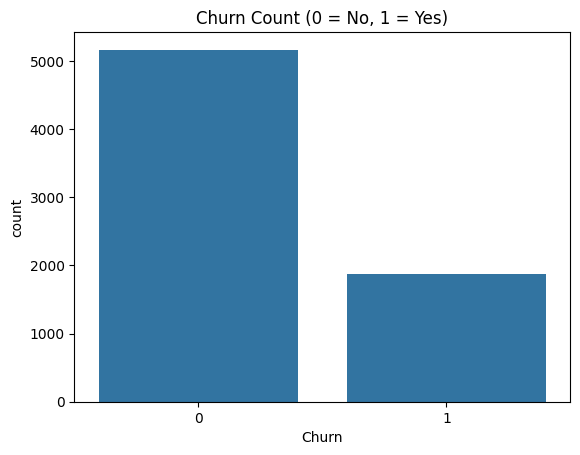

In [ ]:
# If Churn is 0/1
overall_churn_rate = df["Churn"].mean()
print("Overall churn rate:", overall_churn_rate)

# Or, to see counts and percentages in a table
churn_counts = df["Churn"].value_counts()
churn_percent = df["Churn"].value_counts(normalize=True) * 100
print(churn_counts)
print(churn_percent)

# Visual representation (bar plot)
sns.countplot(x="Churn", data=df)
plt.title("Churn Count (0 = No, 1 = Yes)")
plt.show()


# **2. Distribution by gender,partner,dependents**

gender
Female    0.269595
Male      0.262046
Name: Churn, dtype: float64


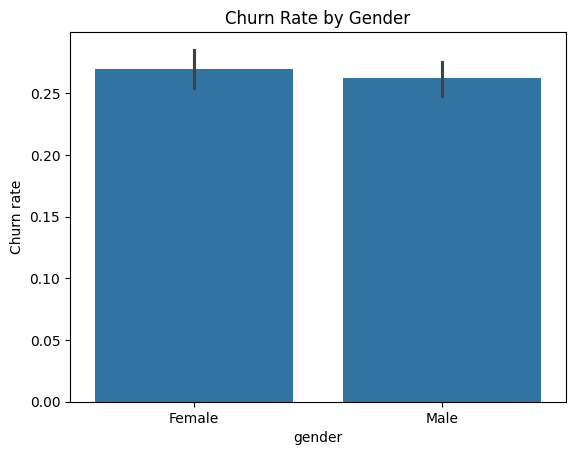

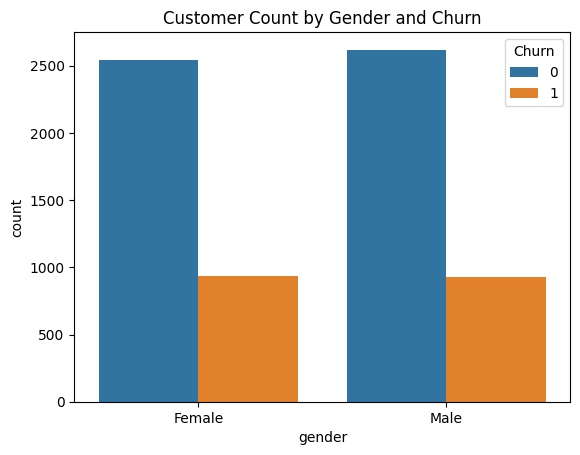

In [ ]:
# Table
print(df.groupby("gender")["Churn"].mean())

# Bar chart
sns.barplot(x="gender", y="Churn", data=df)
plt.title("Churn Rate by Gender")
plt.ylabel("Churn rate")
plt.show()

# Count plot with churn hue
sns.countplot(x="gender", hue="Churn", data=df)
plt.title("Customer Count by Gender and Churn")
plt.show()


Partner
No     0.329761
Yes    0.197171
Name: Churn, dtype: float64


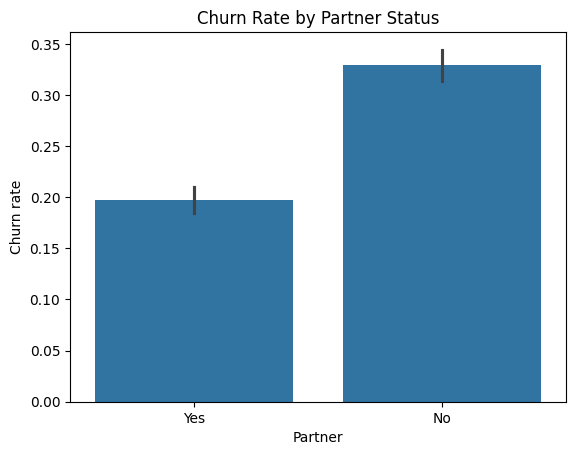

In [ ]:
print(df.groupby("Partner")["Churn"].mean())

sns.barplot(x="Partner", y="Churn", data=df)
plt.title("Churn Rate by Partner Status")
plt.ylabel("Churn rate")
plt.show()


Dependents
No     0.312791
Yes    0.155312
Name: Churn, dtype: float64


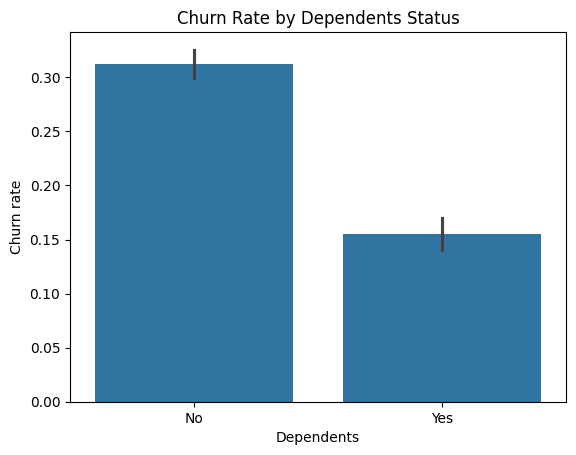

In [ ]:
print(df.groupby("Dependents")["Churn"].mean())

sns.barplot(x="Dependents", y="Churn", data=df)
plt.title("Churn Rate by Dependents Status")
plt.ylabel("Churn rate")
plt.show()


# **3. Tenure distribution and relation with churn**

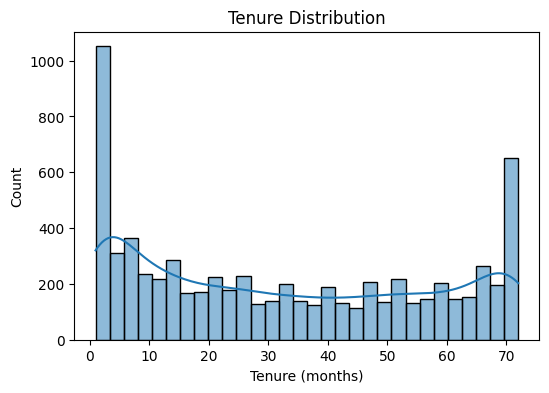

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["tenure"], bins=30, kde=True)
plt.title("Tenure Distribution")
plt.xlabel("Tenure (months)")
plt.show()


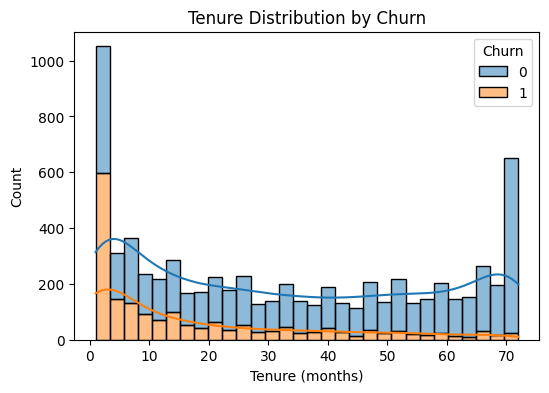

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="tenure", hue="Churn", bins=30, kde=True, multiple="stack")
plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure (months)")
plt.show()


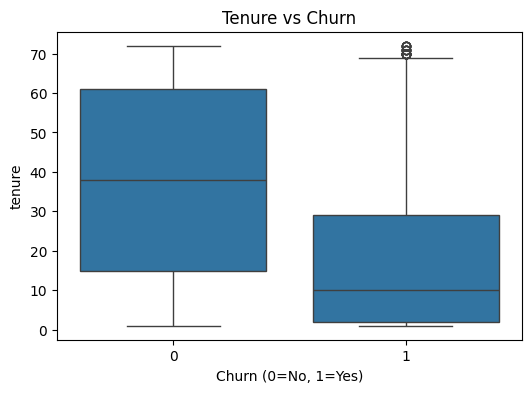

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.xlabel("Churn (0=No, 1=Yes)")
plt.show()


# **4. Churn by contract type and payment method**

Contract
Month-to-month    0.427097
One year          0.112772
Two year          0.028487
Name: Churn, dtype: float64


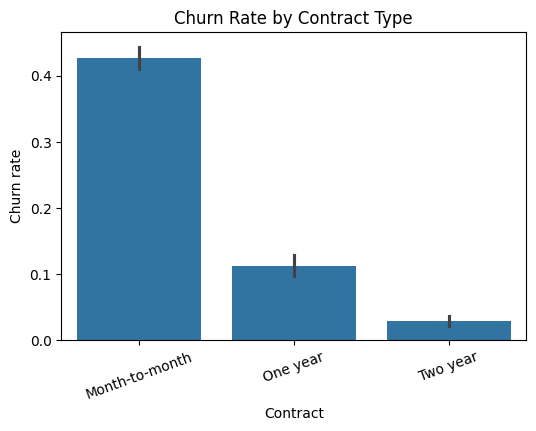

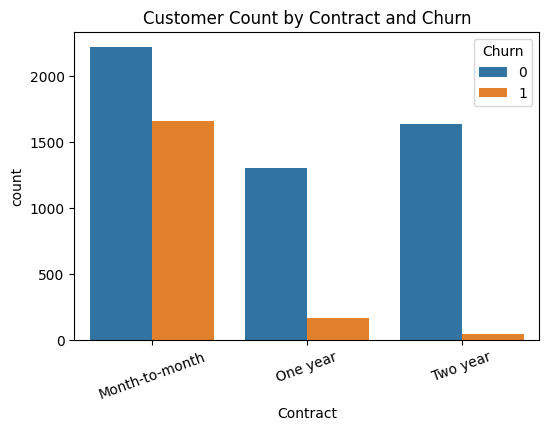

In [ ]:
print(df.groupby("Contract")["Churn"].mean())

plt.figure(figsize=(6,4))
sns.barplot(x="Contract", y="Churn", data=df)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn rate")
plt.xticks(rotation=20)
plt.show()

# Count plot with churn hue
plt.figure(figsize=(6,4))
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Customer Count by Contract and Churn")
plt.xticks(rotation=20)
plt.show()


PaymentMethod
Bank transfer (automatic)    0.167315
Credit card (automatic)      0.152531
Electronic check             0.452854
Mailed check                 0.192020
Name: Churn, dtype: float64


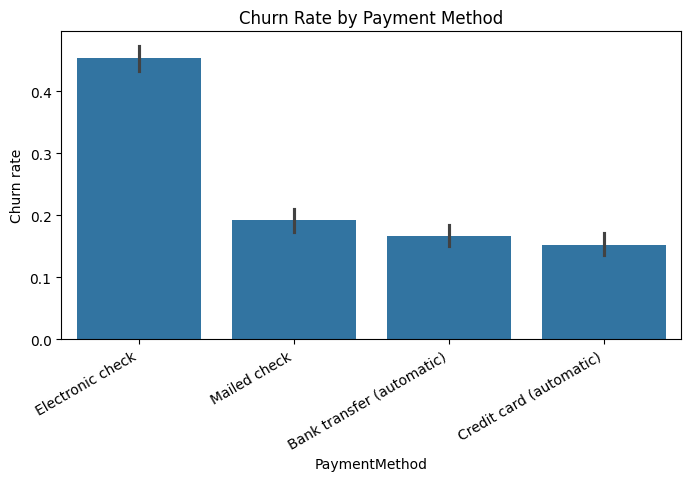

In [ ]:
print(df.groupby("PaymentMethod")["Churn"].mean())

plt.figure(figsize=(8,4))
sns.barplot(x="PaymentMethod", y="Churn", data=df)
plt.title("Churn Rate by Payment Method")
plt.ylabel("Churn rate")
plt.xticks(rotation=30, ha="right")
plt.show()


# **1. Create tenure and charges segments**

In [ ]:
# Tenure buckets
bins_tenure = [0, 12, 24, 48, 72]   # adjust if you want
labels_tenure = ["0-12", "13-24", "25-48", "49-72"]
df["tenure_group"] = pd.cut(df["tenure"], bins=bins_tenure, labels=labels_tenure, include_lowest=True)

# Monthly charges buckets
bins_charges = [0, 35, 70, 105, df["MonthlyCharges"].max()+1]
labels_charges = ["Low", "Medium", "High", "Very High"]
df["charge_group"] = pd.cut(df["MonthlyCharges"], bins=bins_charges, labels=labels_charges, include_lowest=True)

df[["tenure_group", "charge_group", "Contract"]].head()


,tenure_group,charge_group,Contract
0,0-12,Low,Month-to-month
1,25-48,Medium,One year
2,0-12,Medium,Month-to-month
3,25-48,Medium,One year
4,0-12,High,Month-to-month


# **2. Segment and compute churn rates**

In [ ]:
# Churn within each tenure group
print(df.groupby("tenure_group")["Churn"].mean())

# Churn within each charge group
print(df.groupby("charge_group")["Churn"].mean())

# Churn by contract type
print(df.groupby("Contract")["Churn"].mean())


tenure_group
0-12     0.476782
13-24    0.287109
25-48    0.203890
49-72    0.095132
Name: Churn, dtype: float64
charge_group
Low          0.109312
Medium       0.239837
High         0.378387
Very High    0.208494
Name: Churn, dtype: float64
Contract
Month-to-month    0.427097
One year          0.112772
Two year          0.028487
Name: Churn, dtype: float64


/tmp/ipython-input-1245880846.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("tenure_group")["Churn"].mean())
/tmp/ipython-input-1245880846.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("charge_group")["Churn"].mean())


In [ ]:
seg_churn = (
    df.groupby(["tenure_group", "charge_group", "Contract"])["Churn"]
      .agg(["mean", "count"])
      .reset_index()
      .rename(columns={"mean": "churn_rate", "count": "customers"})
)

seg_churn.sort_values("churn_rate", ascending=False).head(20)


/tmp/ipython-input-1753912539.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["tenure_group", "charge_group", "Contract"])["Churn"]


,tenure_group,charge_group,Contract,churn_rate,customers
10,0-12,Very High,One year,1.000000,1
22,13-24,Very High,One year,1.000000,1
6,0-12,High,Month-to-month,0.691578,843
9,0-12,Very High,Month-to-month,0.615385,13
21,13-24,Very High,Month-to-month,0.583333,12
18,13-24,High,Month-to-month,0.488038,418
33,25-48,Very High,Month-to-month,0.461538,52
3,0-12,Medium,Month-to-month,0.454690,629
30,25-48,High,Month-to-month,0.412731,487
42,49-72,High,Month-to-month,0.299107,224


/tmp/ipython-input-3666473158.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  seg_churn.pivot_table(index="tenure_group", columns="charge_group", values="churn_rate"),


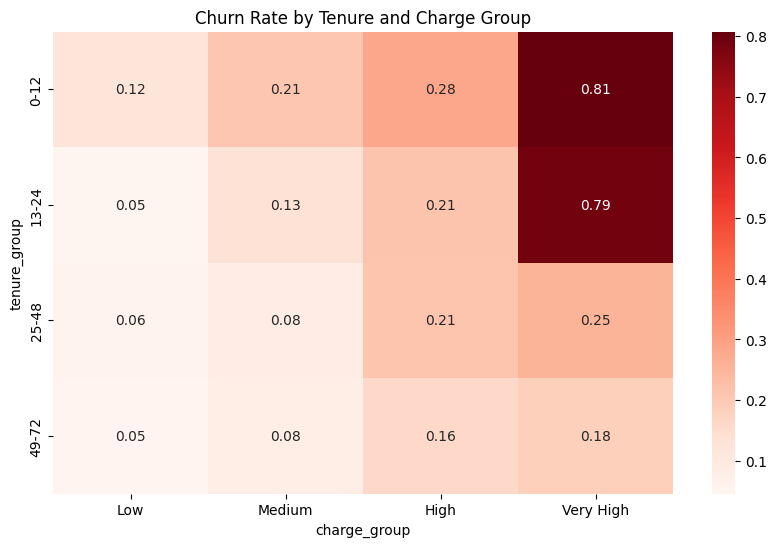

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(
    seg_churn.pivot_table(index="tenure_group", columns="charge_group", values="churn_rate"),
    annot=True, fmt=".2f", cmap="Reds"
)
plt.title("Churn Rate by Tenure and Charge Group")
plt.show()


# **3. Identify high‑value, at‑risk segments**

In [ ]:
overall_churn = df["Churn"].mean()

high_value_segments = seg_churn[
    (seg_churn["charge_group"].isin(["High", "Very High"])) &
    (seg_churn["churn_rate"] > overall_churn)
]

high_value_segments.sort_values("churn_rate", ascending=False).head(20)


,tenure_group,charge_group,Contract,churn_rate,customers
22,13-24,Very High,One year,1.000000,1
10,0-12,Very High,One year,1.000000,1
6,0-12,High,Month-to-month,0.691578,843
9,0-12,Very High,Month-to-month,0.615385,13
21,13-24,Very High,Month-to-month,0.583333,12
18,13-24,High,Month-to-month,0.488038,418
33,25-48,Very High,Month-to-month,0.461538,52
30,25-48,High,Month-to-month,0.412731,487
42,49-72,High,Month-to-month,0.299107,224
34,25-48,Very High,One year,0.296296,27


# **4. List individual high‑value at‑risk customers**

In [ ]:
# Get conditions for high-value & at-risk
hv_seg_keys = high_value_segments[["tenure_group", "charge_group", "Contract"]]

# Merge back to original df
df_hv_risk = df.merge(
    hv_seg_keys,
    on=["tenure_group", "charge_group", "Contract"],
    how="inner"
)

# Keep useful columns
cols_keep = ["customerID", "tenure", "MonthlyCharges", "Contract", "tenure_group", "charge_group", "Churn"]
df_hv_risk = df_hv_risk[cols_keep]

df_hv_risk.head(20)


,customerID,tenure,MonthlyCharges,Contract,tenure_group,charge_group,Churn
0,9237-HQITU,2,70.70,Month-to-month,0-12,High,1
1,9305-CDSKC,8,99.65,Month-to-month,0-12,High,1
2,1452-KIOVK,22,89.10,Month-to-month,13-24,High,0
3,7892-POOKP,28,104.80,Month-to-month,25-48,High,1
4,0280-XJGEX,49,103.70,Month-to-month,49-72,High,1
5,5129-JLPIS,25,105.50,Month-to-month,25-48,Very High,0
6,4183-MYFRB,21,90.05,Month-to-month,13-24,High,0
7,6467-CHFZW,47,99.35,Month-to-month,25-48,High,1
8,4929-XIHVW,2,95.50,Month-to-month,0-12,High,0
9,6572-ADKRS,46,74.80,Month-to-month,25-48,High,0


# **1.Data preparation**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


In [ ]:
df = df.drop(columns=["customerID"])


In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

categorical_cols = X.select_dtypes(include=["object"]).columns
numeric_cols = X.select_dtypes(exclude=["object"]).columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# **2. Train/test split**

In [ ]:
# Start from original values for Churn (string)
# If you still have the raw CSV, reload it first:
df = pd.read_csv("Telco_Customer_Churn_Dataset  (3).csv")

# Strip spaces and map
df["Churn"] = df["Churn"].str.strip()
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Check for NaN in Churn
print(df["Churn"].isna().sum())


0


In [ ]:
# Drop customerID (optional but recommended)
df = df.drop(columns=["customerID"])

X = df.drop("Churn", axis=1)
y = df["Churn"]

print("NaN in y:", y.isna().sum())


NaN in y: 0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# **3. Baseline models (Logistic Regression, Decision Tree, Random Forest)**

In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

categorical_cols = X.select_dtypes(include=["object"]).columns
numeric_cols = X.select_dtypes(exclude=["object"]).columns

from sklearn.preprocessing import OneHotEncoder

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

log_reg_clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

log_reg_clf.fit(X_train, y_train)
y_pred_lr = log_reg_clf.predict(X_test)

In [ ]:
dt_clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", DecisionTreeClassifier(random_state=42))
])

dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)


In [ ]:
rf_clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])

rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)


In [ ]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

Logistic Regression Accuracy: 0.7942


In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Random Forest Accuracy: 0.7842


In [ ]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

Decision Tree Accuracy: 0.7800


In [ ]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

Logistic Regression Accuracy: 0.7942


# **4. Evaluate models: accuracy, precision, recall, F1**

In [ ]:
def print_metrics(y_true, y_pred, model_name):
    print(f"=== {model_name} ===")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-score :", f1_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))


In [ ]:
print_metrics(y_test, y_pred_lr, "Logistic Regression")
print_metrics(y_test, y_pred_dt, "Decision Tree")
print_metrics(y_test, y_pred_rf, "Random Forest")


=== Logistic Regression ===
Accuracy : 0.794180269694819
Precision: 0.63125
Recall   : 0.5401069518716578
F1-score : 0.5821325648414986
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409

=== Decision Tree ===
Accuracy : 0.7799858055358411
Precision: 0.5969696969696969
Recall   : 0.5267379679144385
F1-score : 0.5596590909090909
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1035
           1       0.60      0.53      0.56       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409

=== Random Forest ===
Accuracy : 0.7842441447835344
Precision: 0.625

# **5. Feature selection**

In [ ]:
from sklearn.feature_selection import SelectFromModel

fs_model = LogisticRegression(max_iter=1000)

fs_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("feature_select", SelectFromModel(fs_model, threshold="median")),
    ("model", LogisticRegression(max_iter=1000))
])

fs_pipeline.fit(X_train, y_train)
y_pred_fs = fs_pipeline.predict(X_test)
print_metrics(y_test, y_pred_fs, "LogReg + Feature Selection")


=== LogReg + Feature Selection ===
Accuracy : 0.7977288857345636
Precision: 0.6386292834890965
Recall   : 0.5481283422459893
F1-score : 0.5899280575539568
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



# **6. Hyperparameter tuning with GridSearchCV**

In [ ]:
param_grid_rf = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 5, 10],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2]
}

rf_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])

grid_search_rf = GridSearchCV(
    rf_pipeline,
    param_grid=param_grid_rf,
    cv=3,
    scoring="f1",
    n_jobs=-1
)

grid_search_rf.fit(X_train, y_train)

print("Best params:", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print_metrics(y_test, y_pred_best_rf, "Random Forest (Tuned)")


Best params: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
=== Random Forest (Tuned) ===
Accuracy : 0.7849538679914834
Precision: 0.6254416961130742
Recall   : 0.4732620320855615
F1-score : 0.5388127853881278
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.47      0.54       374

    accuracy                           0.78      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409

